<a href="https://colab.research.google.com/github/ShreshthaJha6/MachineLearningProjects/blob/main/SVM_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#import all the necessory libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import time

In [3]:
#load the dataset
mnist = fetch_openml('mnist_784')

X,y = mnist['data'], mnist['target']

In [4]:
y = y.astype(np.int64) #converting the target to int

In [5]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [6]:
X_train.shape

(49000, 784)

In [7]:
X_test.shape

(21000, 784)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#LINEAR SVM.
start_time = time.time()
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

elapsed_time_linear = time.time() - start_time
print(f"Linear Kernel - Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}, Time: {elapsed_time_linear:.2f}s")
print(classification_report(y_test, y_pred_linear))

Linear Kernel - Accuracy: 0.9200, Time: 405.04s
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2058
           1       0.95      0.98      0.96      2364
           2       0.89      0.90      0.89      2133
           3       0.88      0.91      0.89      2176
           4       0.91      0.94      0.93      1936
           5       0.89      0.88      0.89      1915
           6       0.96      0.94      0.95      2088
           7       0.94      0.94      0.94      2248
           8       0.92      0.85      0.88      1992
           9       0.92      0.88      0.90      2090

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



In [34]:
results = {
    'kernel': [],
    'accuracy': [],
    'f1_score': [],
    'time': []
}

In [35]:
results['kernel'].append('Linear')
results['accuracy'].append(accuracy_score(y_test, y_pred_linear))
results['f1_score'].append(f1_score(y_test, y_pred_linear, average='weighted'))
results['time'].append(elapsed_time_linear)

In [16]:
#RBF SVM.
start_time = time.time()
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

elapsed_time_rbf = time.time() - start_time
print(f"Linear Kernel - Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}, Time: {elapsed_time_rbf:.2f}s")
print(classification_report(y_test, y_pred_rbf))

Linear Kernel - Accuracy: 0.9623, Time: 586.79s
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2058
           1       0.98      0.99      0.98      2364
           2       0.95      0.96      0.96      2133
           3       0.96      0.95      0.96      2176
           4       0.96      0.96      0.96      1936
           5       0.97      0.95      0.96      1915
           6       0.97      0.98      0.97      2088
           7       0.92      0.97      0.94      2248
           8       0.97      0.95      0.96      1992
           9       0.96      0.93      0.95      2090

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



In [36]:
results['kernel'].append('RBF')
results['accuracy'].append(accuracy_score(y_test, y_pred_rbf))
results['f1_score'].append(f1_score(y_test, y_pred_rbf, average='weighted'))
results['time'].append(elapsed_time_rbf)

In [19]:
#polynomial SVM.
start_time = time.time()
svm_polynomial = svm.SVC(kernel='poly')
svm_polynomial.fit(X_train, y_train)

y_pred_polynomial = svm_polynomial.predict(X_test)

elapsed_time_polynomial = time.time() - start_time
print(f"Linear Kernel - Accuracy: {accuracy_score(y_test, y_pred_polynomial):.4f}, Time: {elapsed_time_polynomial:.2f}s")
print(classification_report(y_test, y_pred_polynomial))

Linear Kernel - Accuracy: 0.9577, Time: 915.84s
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2058
           1       0.98      0.98      0.98      2364
           2       0.97      0.94      0.95      2133
           3       0.97      0.94      0.95      2176
           4       0.93      0.97      0.95      1936
           5       0.97      0.95      0.96      1915
           6       0.98      0.98      0.98      2088
           7       0.97      0.94      0.95      2248
           8       0.88      0.97      0.92      1992
           9       0.94      0.94      0.94      2090

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



In [37]:
results['kernel'].append('Polynomial')
results['accuracy'].append(accuracy_score(y_test, y_pred_polynomial))
results['f1_score'].append(f1_score(y_test, y_pred_polynomial, average='weighted'))
results['time'].append(elapsed_time_polynomial)

In [38]:
print(f"Kernels: {results['kernel']}")
print(f"F1-scores: {results['f1_score']}")

Kernels: ['Linear', 'RBF', 'Polynomial']
F1-scores: [0.9197958868174373, 0.9623044118018581, 0.9579188734681535]


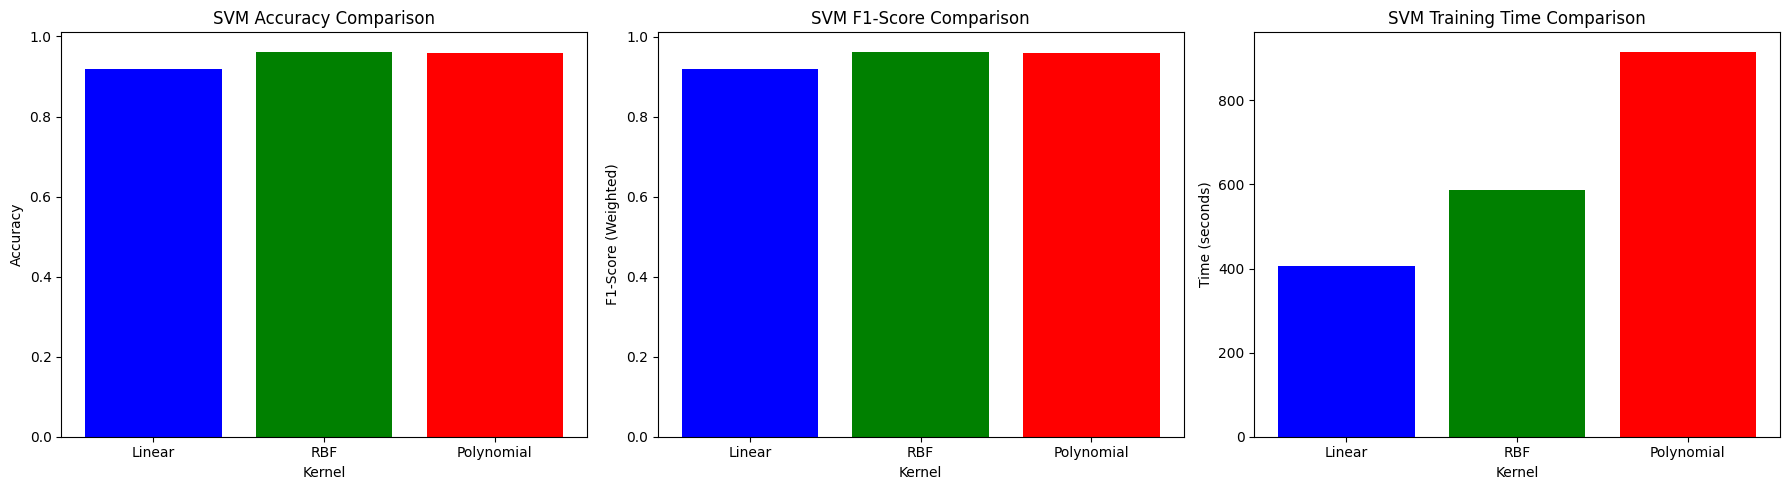

In [39]:
# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy Plot
ax[0].bar(results['kernel'], results['accuracy'], color=['blue', 'green', 'red'])
ax[0].set_title('SVM Accuracy Comparison')
ax[0].set_xlabel('Kernel')
ax[0].set_ylabel('Accuracy')

# F1-score Plot
ax[1].bar(results['kernel'], results['f1_score'], color=['blue', 'green', 'red'])
ax[1].set_title('SVM F1-Score Comparison')
ax[1].set_xlabel('Kernel')
ax[1].set_ylabel('F1-Score (Weighted)')

# Training Time Plot
ax[2].bar(results['kernel'], results['time'], color=['blue', 'green', 'red'])
ax[2].set_title('SVM Training Time Comparison')
ax[2].set_xlabel('Kernel')
ax[2].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()